In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%run input.ipynb
%run functions.ipynb


#plot_saving_dir = "/media/kusterlab/internal_projects/active/TOPAS/Publications/Manuscript_MTB/Invests for Paper_Amir/3B"
plot_saving_dir = '/home/amir/Desktop'

# For the TUPAC scores

In [19]:
tp_measure_df = tupac_df[tupac_df['Gene names'].isin(list_tupacs)]
values_vars = tp_measure_df.columns[~tp_measure_df.columns.str.contains('Gene names')].tolist()
id_vars = tp_measure_df.columns[tp_measure_df.columns.str.contains('Gene names')].tolist()
df = pd.melt(tp_measure_df,id_vars=id_vars,value_vars=values_vars)
df.columns = ['Protein_name','patient','z_score']
df = df.dropna(subset='z_score')

proteins = df.Protein_name.unique().tolist()
patietnts_z_scores = pd.DataFrame(proteins,columns=['proteins'])
for i,patient in enumerate(list_patients):
    patietnts_z_scores[patient] = [get_z_score_per_patient_per_protein_name_fp(list_patients[i],x,tp_measure_df) for x in proteins]
patietnts_z_scores = patietnts_z_scores.set_index('proteins')

df_tupac = df.copy()
patietnts_z_scores_tupac = patietnts_z_scores.copy()

#  For FP expression z_scores

In [20]:
   
fp_measure_df = fp_measure_df[fp_measure_df['Gene names'].isin(list_proteins)]
values_vars = fp_measure_df.columns[~fp_measure_df.columns.str.contains('Gene names')].tolist()
id_vars = fp_measure_df.columns[fp_measure_df.columns.str.contains('Gene names')].tolist()
df = pd.melt(fp_measure_df,id_vars=id_vars,value_vars=values_vars)
df.columns = ['Protein_name','patient','z_score']
df = df.dropna(subset='z_score')

proteins = df.Protein_name.unique().tolist()
patietnts_z_scores = pd.DataFrame(proteins,columns=['proteins'])
for i,patient in enumerate(list_patients):
    patietnts_z_scores[patient] = [get_z_score_per_patient_per_protein_name_fp(list_patients[i],x,fp_measure_df) for x in proteins]
patietnts_z_scores = patietnts_z_scores.set_index('proteins')

df_fp = df.copy()
patietnts_z_scores_fp = patietnts_z_scores.copy()

# For PP z_Scores

In [21]:

pp_measure_df = pp_measure_df[pp_measure_df['Gene names'].isin(list_proteins) & pp_measure_df['Modified sequence'].isin(list_mod_sequence)]
pp_measure_df['Modified sequence'] = pp_measure_df['Gene names'] + pp_measure_df['Modified sequence']
#pp_measure_df['Modified sequence'] = pp_measure_df['Modified sequence'].map(mod_sequence_dict)

pp_measure_df.drop(['Gene names', 'Proteins'],axis=1,inplace=True)

values_vars = pp_measure_df.columns[~ pp_measure_df.columns.str.contains('Modified sequence')].tolist()
id_vars = pp_measure_df.columns[pp_measure_df.columns.str.contains('Modified sequence')].tolist()
df = pd.melt(pp_measure_df,id_vars=id_vars,value_vars=values_vars)
df.columns = ['Protein_name','patient','z_score']
df = df.dropna(subset='z_score')

proteins = df.Protein_name.unique().tolist()
patietnts_z_scores = pd.DataFrame(proteins,columns=['proteins'])
for i,patient in enumerate(list_patients):
    patietnts_z_scores[patient] = [get_z_score_per_patient_per_peptides_name_pp(list_patients[i],x,pp_measure_df) for x in proteins]
patietnts_z_scores = patietnts_z_scores.set_index('proteins')
df_pp = df.copy()
patietnts_z_scores_pp = patietnts_z_scores.copy()

# For the phoshphorylation scores

In [22]:

phoshphoryltio_scores_df = phoshphoryltio_scores_df[phoshphoryltio_scores_df['Gene names'].isin(list_phopshorylation_scores)]
values_vars = phoshphoryltio_scores_df.columns[~phoshphoryltio_scores_df.columns.str.contains('Gene names')].tolist()
id_vars = phoshphoryltio_scores_df.columns[phoshphoryltio_scores_df.columns.str.contains('Gene names')].tolist()
df = pd.melt(phoshphoryltio_scores_df,id_vars=id_vars,value_vars=values_vars)
df.columns = ['Protein_name','patient','z_score']
df = df.dropna(subset='z_score')

proteins = df.Protein_name.unique().tolist()
patietnts_z_scores = pd.DataFrame(proteins,columns=['proteins'])
for i,patient in enumerate(list_patients):
    patietnts_z_scores[patient] = [get_z_score_per_patient_per_protein_name_pscores(list_patients[i],x,phoshphoryltio_scores_df) for x in proteins]

df['Protein_name'] = df['Protein_name'] + '_phospho_Scores'
patietnts_z_scores['proteins'] = patietnts_z_scores['proteins'] + '_phospho_Scores'
patietnts_z_scores = patietnts_z_scores.set_index('proteins')

df_ps = df.copy()
patietnts_z_scores_ps = patietnts_z_scores.copy()


# For the Kianse scores

In [23]:
# similar to phoshphrylation scores with a different input
phoshphoryltio_scores_df = kinase_scores_df[kinase_scores_df['Gene names'].isin(list_kinase_scores)]
values_vars = phoshphoryltio_scores_df.columns[~phoshphoryltio_scores_df.columns.str.contains('Gene names')].tolist()
id_vars = phoshphoryltio_scores_df.columns[phoshphoryltio_scores_df.columns.str.contains('Gene names')].tolist()
df = pd.melt(phoshphoryltio_scores_df,id_vars=id_vars,value_vars=values_vars)
df.columns = ['Protein_name','patient','z_score']
df = df.dropna(subset='z_score')

proteins = df.Protein_name.unique().tolist()
patietnts_z_scores = pd.DataFrame(proteins,columns=['proteins'])
for i,patient in enumerate(list_patients):
    patietnts_z_scores[patient] = [get_z_score_per_patient_per_protein_name_pscores(list_patients[i],x,phoshphoryltio_scores_df) for x in proteins]

df['Protein_name'] = df['Protein_name'] + '_kinase_Scores'
patietnts_z_scores['proteins'] = patietnts_z_scores['proteins'] + '_kinae_Scores'
patietnts_z_scores = patietnts_z_scores.set_index('proteins')

df_kinase = df.copy()
patietnts_z_scores_kinase = patietnts_z_scores.copy()

# concatanating all data layers

In [24]:
df = pd.concat([df_fp,df_pp,df_ps,df_kinase,df_tupac])
patietnts_z_scores = pd.concat([patietnts_z_scores_fp,patietnts_z_scores_pp,patietnts_z_scores_ps,patietnts_z_scores_kinase,patietnts_z_scores_tupac])
print(df.shape)
#df = df_pp
#patietnts_z_scores = patietnts_z_scores_pp

(15399, 3)


# subsetting for the Chordoma Patients

In [25]:
chordoma_caseas = meta_df['Sample name'][meta_df.code_oncotree == 'CHDM'].tolist()
chordoma_caseas_z_scored = ['zscore_' + x for x in chordoma_caseas]
df = df[df.patient.isin([*chordoma_caseas,*chordoma_caseas_z_scored])]
print(df.shape)

(1541, 3)


# Counts excel table

In [26]:
df = df.dropna()
counts = df.groupby(['Protein_name'])['z_score'].count()
counts.to_excel(f'{plot_saving_dir}/counts.xls')

/tmp/ipykernel_2108519/1995279865.py:3: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  counts.to_excel(f'{plot_saving_dir}/counts.xls')


# Ridge plot with KDE

/home/amir/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/home/amir/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


H021-REMV5U-T1
H021-5YEPF5-M1
H021-NQ7S9M-T1
H021-N624KQ-T1
H021-2GFWNK-M1
H021-YTWLBM-T3-E1
H021-9DVBZG-M1-E2
H021-HGZEZ3-M4-Q1
H021-UQBN7H-T2


<Figure size 1440x1440 with 0 Axes>

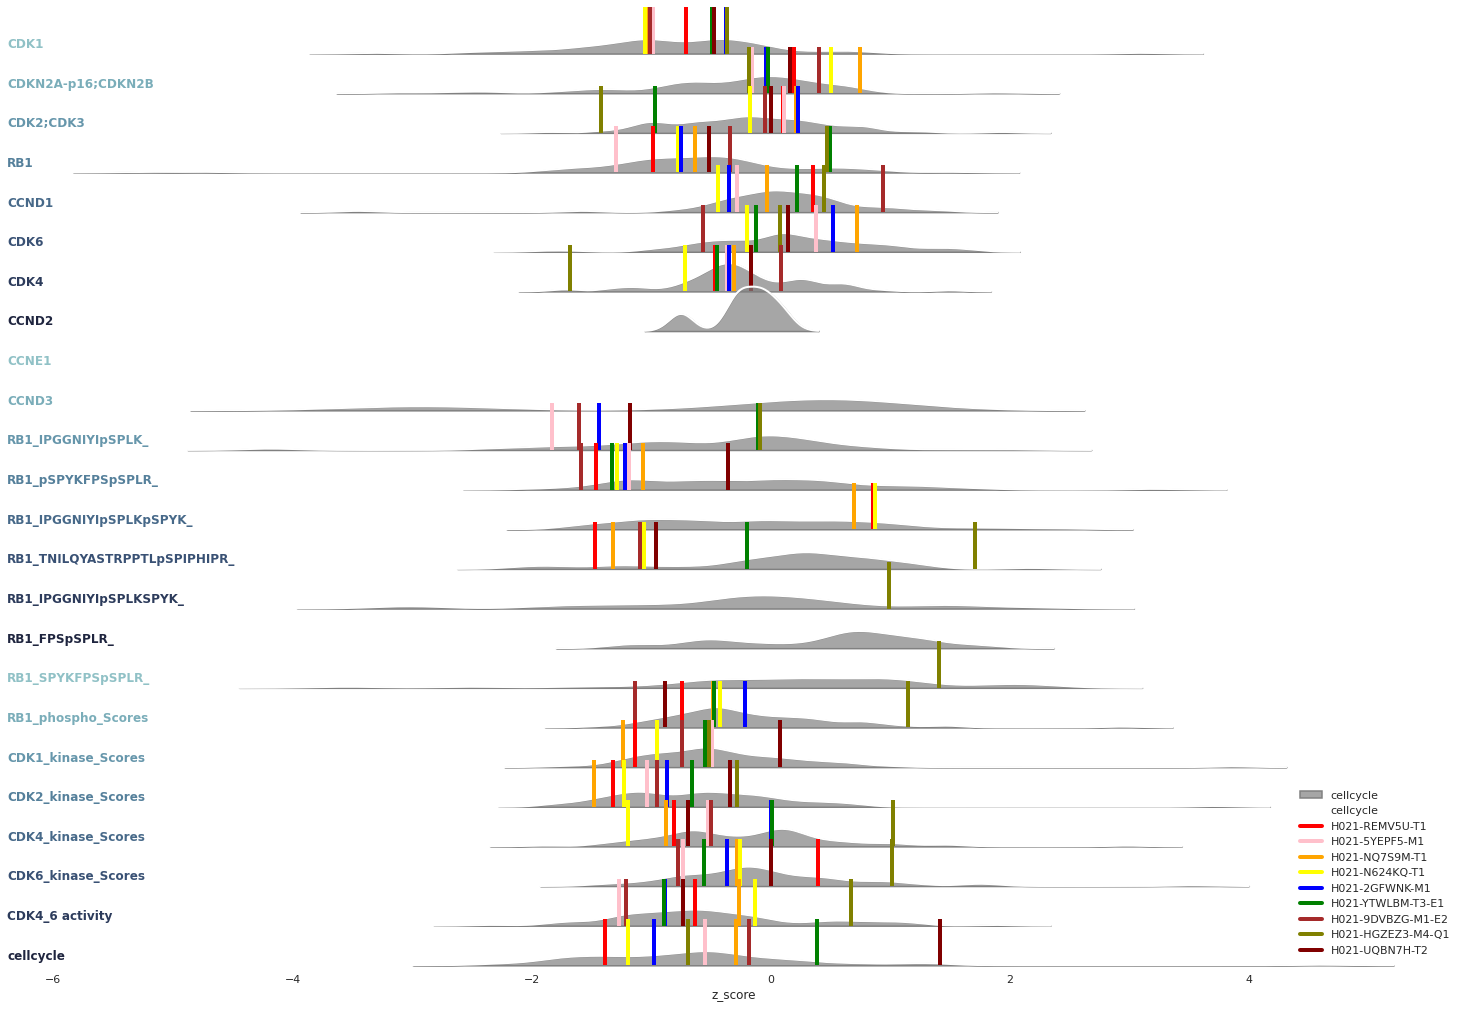

In [27]:

fig = plt.figure(figsize=(20,20))

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(8, rot=-.25, light=.7)

g = sns.FacetGrid(df, row="Protein_name", hue="Protein_name", aspect=35, height=.6, palette=pal)

g.map(sns.kdeplot, "z_score", bw_adjust=.5, clip_on=False, color='grey',fill=True, alpha=0.7, linewidth=1.5)
g.map(sns.kdeplot, "z_score", clip_on=False, color="w", lw=2, bw_adjust=.5)
## ADDING V_lines
axes = g.axes.flatten()
for j,col in enumerate(patietnts_z_scores.columns):
    print(col)
    for i, ax in enumerate(axes):

        axes[i].axvline(patietnts_z_scores.iloc[i,j], linewidth=4, color=patient_color[j],label=col)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "z_score")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.15)
# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
#
legend = plt.legend(loc='lower right')
frame = legend.get_frame()
frame.set_color('white')
plt.savefig(f'{plot_saving_dir}/ridge_plot_CHDM_pancancer_all.svg',dpi=300)

# Ridge plot with hist

H021-REMV5U-T1
H021-5YEPF5-M1
H021-NQ7S9M-T1
H021-N624KQ-T1
H021-2GFWNK-M1
H021-YTWLBM-T3-E1
H021-9DVBZG-M1-E2
H021-HGZEZ3-M4-Q1
H021-UQBN7H-T2


<Figure size 1440x1440 with 0 Axes>

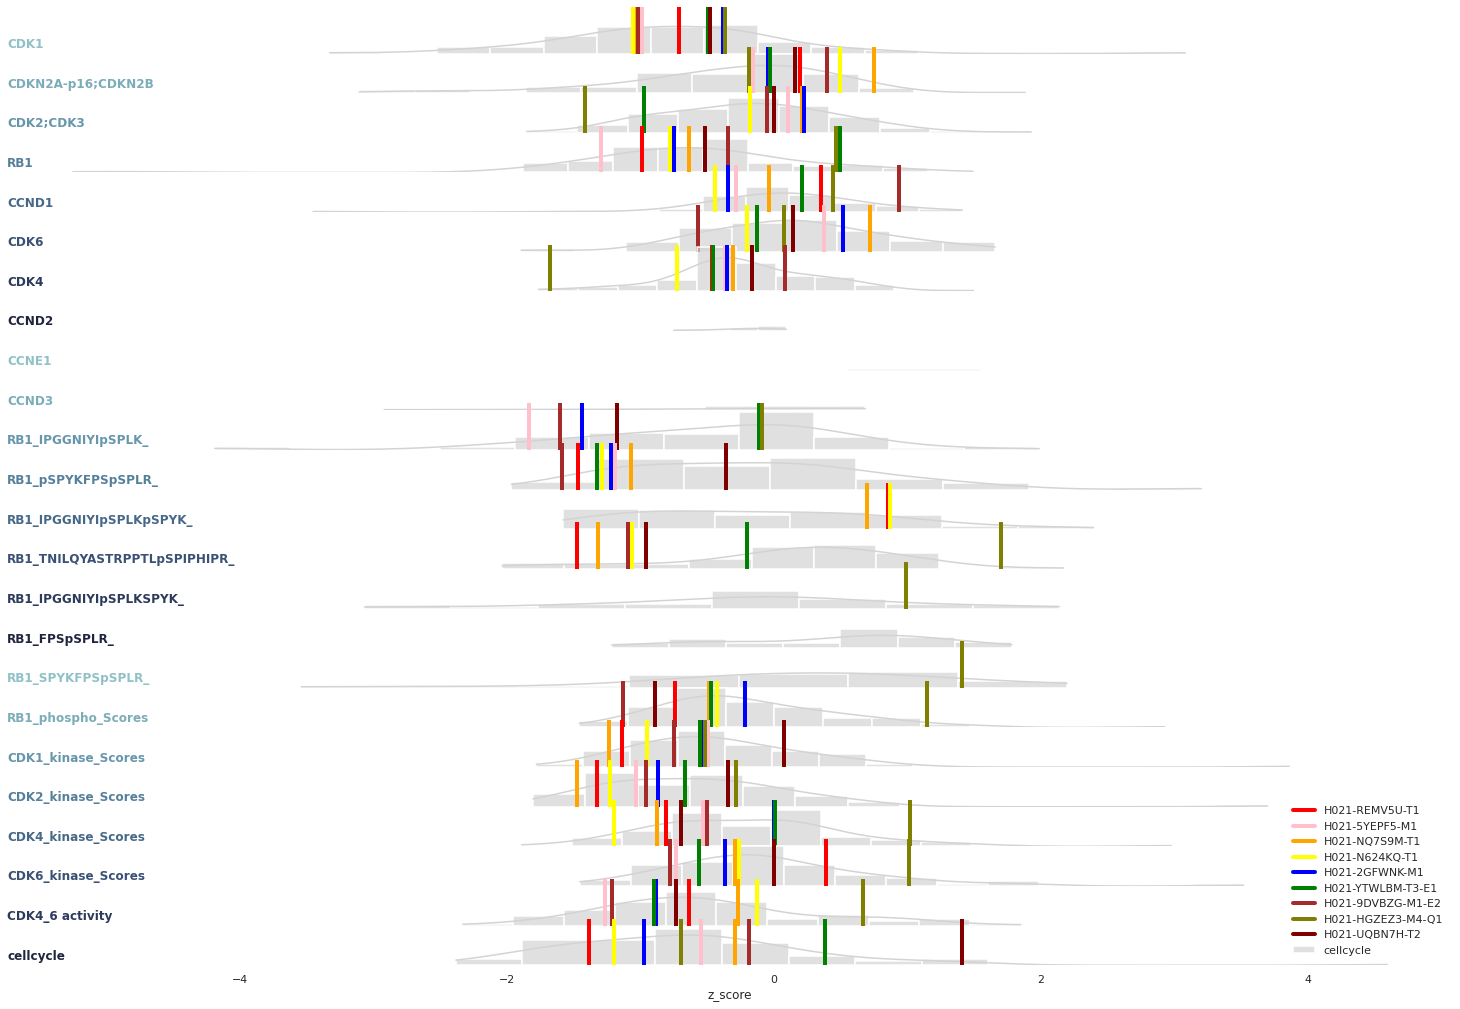

In [28]:
fig = plt.figure(figsize=(20,20))

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(8, rot=-.25, light=.7)
#pal = sns.cubehelix_palette("Spectral")
g = sns.FacetGrid(df, row="Protein_name", hue="Protein_name", aspect=35, height=.6, palette=pal)
# Draw the densities in a few steps
g.map(sns.histplot, "z_score", kde=True,bins='auto', clip_on=False, color='lightgrey',fill=True, alpha=0.7, linewidth=1.5)

## ADDING V_lines
axes = g.axes.flatten()
for j,col in enumerate(patietnts_z_scores.columns):
    print(col)
    for i, ax in enumerate(axes):
        #axes[i].axvline(z_scores[i], ls='--')
        axes[i].axvline(patietnts_z_scores.iloc[i,j], linewidth=4, color=patient_color[j],label=col)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "z_score")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.15)
# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
#
legend = plt.legend(loc='lower right')
frame = legend.get_frame()
frame.set_color('white')
plt.savefig(f'{plot_saving_dir}/hist_plot_CHDM_pancancer_all.svg',dpi=300)